In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
import torch.nn as nn
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F
%matplotlib inline

In [2]:
dataset = MNIST(root='data/', download=True,transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.8,), (0.3,))]))
val_size = 10000
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, shuffle=True, num_workers=1, pin_memory=True,batch_size=32)
val_loader = DataLoader(val_ds, num_workers=1, pin_memory=True,batch_size=32)

In [3]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [4]:
class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    #To-Do: Add all layers as mentioned in the diagram. You may also tune some parameters for achieving a better accuracy.
    self.conv = nn.Sequential(nn.Conv2d(in_channels=1,out_channels=56,kernel_size=1,stride=1),nn.LeakyReLU(),nn.MaxPool2d(kernel_size=2),
                               nn.Conv2d(in_channels=56,out_channels=28,kernel_size=6,stride=2),nn.LeakyReLU(),nn.MaxPool2d(kernel_size=2),
                               nn.Conv2d(in_channels=28,out_channels=14,kernel_size=2,stride=2),
                               nn.LeakyReLU())
    self.out=nn.Linear(14,10)

  def forward(self, x):
    #To-Do: Add the above created layers in forward function. Don't forget to write the "return" statement properly.
    x = self.conv(x)
    x = x.view(x.size(0), -1)
    return self.out(x)

In [5]:
model = Model()
print(model)

criterion = nn.CrossEntropyLoss()       #To-Do: Choose an appropriate loss function
optimizer = torch.optim.Adam(model.parameters(),lr = 1e-3) #To-Do: Choose an appropriate optimizer

print(model)

'''Output of this cell should be similar to model architecture diagram given'''

Model(
  (conv): Sequential(
    (0): Conv2d(1, 56, kernel_size=(1, 1), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(56, 28, kernel_size=(6, 6), stride=(2, 2))
    (4): LeakyReLU(negative_slope=0.01)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(28, 14, kernel_size=(2, 2), stride=(2, 2))
    (7): LeakyReLU(negative_slope=0.01)
  )
  (out): Linear(in_features=14, out_features=10, bias=True)
)
Model(
  (conv): Sequential(
    (0): Conv2d(1, 56, kernel_size=(1, 1), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(56, 28, kernel_size=(6, 6), stride=(2, 2))
    (4): LeakyReLU(negative_slope=0.01)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(28, 14, kernel_size=(2, 2), str

'Output of this cell should be similar to model architecture diagram given'

In [6]:
def train(epochs, model, loss_func, opt, dataset):
  train_loss = list()
  for epoch in range(epochs):
      total_train_loss = 0
      for i, data in enumerate(dataset, 0):
          inputs, labels = data
          opt.zero_grad()
          outputs = model(inputs)
          loss = loss_func(outputs, labels)
          total_train_loss += loss.item()
          loss.backward()
          opt.step()
          total_train_loss = total_train_loss / (i + 1)
          train_loss.append(total_train_loss)
      print('\nEpoch: {}/{}, Train Loss: {:.5f}'.format(epoch + 1, epochs, total_train_loss))
      predict(model,val_loader)
  print('=== End of Training Process ===')
  return


def predict(model, dataset):
  corr = 0
  total = 0
  with torch.no_grad():
      for data in dataset:
          images, labels = data
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          corr += (predicted == labels).sum().item()
  print('Model Accuracy on 10000 Validation Images: %d %% \n\n' % (100 * corr / total))
  figure = plt.figure(figsize=(25, 4))
  for i in np.arange(8):
      ax = figure.add_subplot(2, 4, i+1, xticks=[], yticks=[])
      ax.imshow(np.squeeze(images[i]), cmap='gray')
      ax.set_title("{} ({})".format(str(predicted[i].item()), str(labels[i].item())))
  plt.show()
  return


Epoch: 1/5, Train Loss: 0.00020
Model Accuracy on 10000 Validation Images: 93 % 




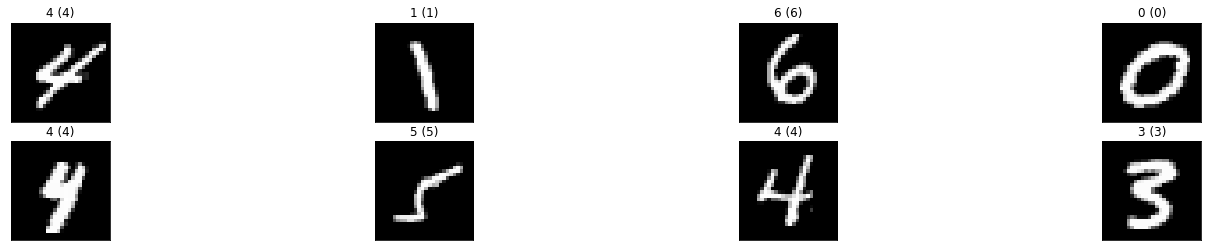


Epoch: 2/5, Train Loss: 0.00009
Model Accuracy on 10000 Validation Images: 94 % 




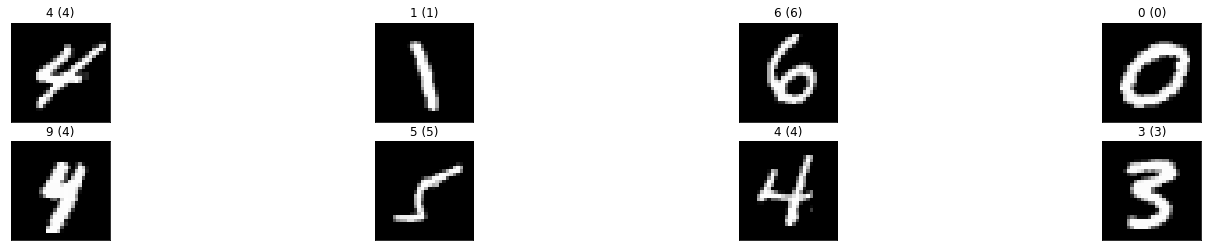


Epoch: 3/5, Train Loss: 0.00001
Model Accuracy on 10000 Validation Images: 94 % 




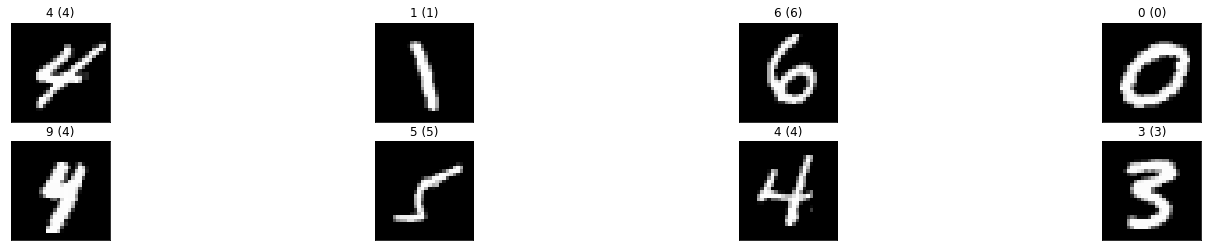


Epoch: 4/5, Train Loss: 0.00006
Model Accuracy on 10000 Validation Images: 93 % 




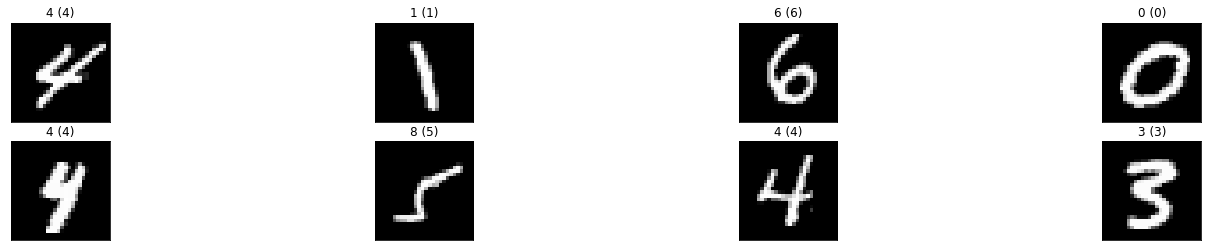


Epoch: 5/5, Train Loss: 0.00005
Model Accuracy on 10000 Validation Images: 95 % 




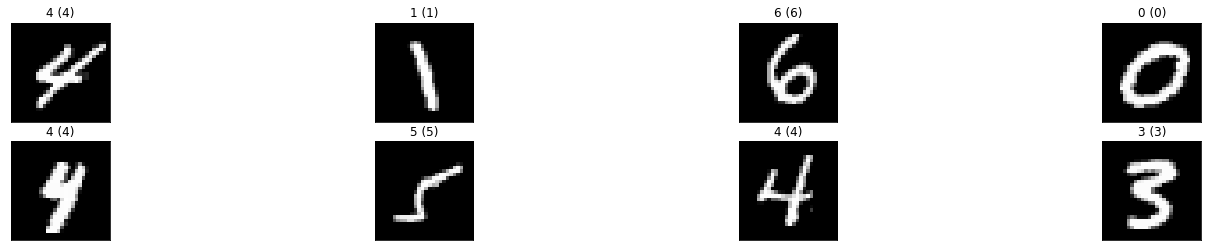

=== End of Training Process ===


In [7]:
train(5,model,criterion,optimizer,train_loader)

Model Accuracy on 10000 Validation Images: 95 % 




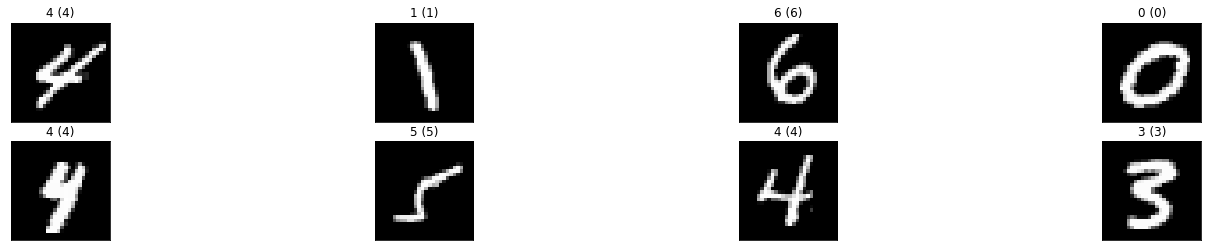

In [8]:
predict(model,val_loader)